In [55]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error,mean_squared_error,mean_squared_log_error,mean_absolute_error,explained_variance_score
import xgboost as xgb

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings('ignore')

In [56]:
db_v4 = 'https://drive.google.com/file/d/19ERs5bmAdxEfgUmTxgfIBhUoT6xPHzZy/view?usp=sharing'
db_v5 = 'https://drive.google.com/file/d/1X4YJP5fjfyk8f_TjSGBdIsTdv8MCCgY7/view?usp=sharing'
db_v5='https://drive.google.com/uc?id=' + db_v5.split('/')[-2]
dataset = pd.read_csv(db_v5)

In [57]:
# dataset["Proposed Use"].value_counts()
# We only keep 1 family dwelling, 2 family dwelling and appartments because it's represent 90% of the dataset and this improve prediction
idx = np.where((dataset["Proposed Use"]=="1 family dwelling") | (dataset["Proposed Use"]=="2 family dwelling") | (dataset["Proposed Use"]=="apartments"))
dataset = dataset.loc[idx]

In [58]:
dataset["Proposed Use_f"]= pd.factorize(dataset["Proposed Use"])[0]
dataset["Proposed Use_f"]

0       0
1       0
2       0
3       0
4       1
5       1
6       1
7       1
8       2
9       0
10      0
11      1
12      2
13      2
14      0
15      1
16      2
17      2
18      2
19      2
20      0
21      0
22      0
23      2
24      1
25      1
26      0
27      0
28      0
29      0
30      1
31      0
32      1
33      2
34      2
35      0
36      1
37      1
38      0
39      1
40      0
41      0
42      0
43      1
44      1
45      0
46      2
47      0
48      0
49      0
50      2
51      1
52      0
53      2
54      2
55      2
56      0
57      0
58      0
59      0
60      1
61      0
62      1
63      1
64      1
65      1
66      1
67      1
68      1
69      1
70      2
71      2
72      2
73      2
74      2
75      2
76      1
77      2
78      2
79      2
80      2
81      2
82      2
83      2
84      2
85      2
86      2
87      2
88      2
89      2
90      2
91      0
92      1
93      1
94      1
95      2
96      0
97      2
98      2
99      0


In [59]:
# Separate target variable Y from features X
print("Separating labels from features...")
features_list = [
    "Permit Type",
    "Number of Proposed Stories",
    "Proposed Use_f",
    "Proposed Units",
    #"Plansets", 
    "Proposed Construction Type", 
    #"Neighborhoods - Analysis Boundaries", 
    #"Zipcode",
    'lat_lon',
    "Year",
]

target_variable = "Est_Cost_Infl_log10"

X = dataset.loc[:,features_list]
Y = dataset.loc[:,target_variable]

print("...Done.")
print()

print('Y : ')
print(Y.head())
print()
print('X :')
print(X.head())

Separating labels from features...
...Done.

Y : 
0    5.696684
1    5.973039
2    6.873685
3    6.469612
4    5.840246
Name: Est_Cost_Infl_log10, dtype: float64

X :
   Permit Type  Number of Proposed Stories  Proposed Use_f  Proposed Units  \
0            2                         4.0               0             3.0   
1            2                         3.0               0             4.0   
2            2                         4.0               0            12.0   
3            2                         3.0               0             8.0   
4            2                         3.0               1             2.0   

   Proposed Construction Type      lat_lon  Year  
0                           5 -4623.268159  1991  
1                           5 -4625.233438  1987  
2                          99 -4627.254130  1977  
3                           5 -4627.238361  1979  
4                           5 -4621.384747  1980  


In [60]:
X.head()

,Permit Type,Number of Proposed Stories,Proposed Use_f,Proposed Units,Proposed Construction Type,lat_lon,Year
0,2,4.0,0,3.0,5,-4623.268159,1991
1,2,3.0,0,4.0,5,-4625.233438,1987
2,2,4.0,0,12.0,99,-4627.254130,1977
3,2,3.0,0,8.0,5,-4627.238361,1979
4,2,3.0,1,2.0,5,-4621.384747,1980


In [61]:
#Manually selecting type of features
numeric_features=[
    'Proposed Units',
    'Number of Proposed Stories',
    'Year', 
    'lat_lon',
    'Proposed Use_f',
    'Proposed Construction Type',
    'Permit Type'
    ]
categorical_features=[] 

In [62]:
# Create pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), # missing values will be replaced by columns' mean
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_transformer = Pipeline(
    steps=[
    ('encoder', OneHotEncoder(drop='first')) # first column will be dropped to avoid creating correlations between features
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

print("Preprocessing X_train...")
print()
X_train = preprocessor.fit_transform(X_train)
print("...Done!")
print(X_train[0:5,:]) # X_train is now a numpy array
print()

# Test pipeline
print("Preprocessing X_test...")
print()
X_test = preprocessor.transform(X_test)
print("...Done!")
print(X_test[0:5,:]) # X_test is now a numpy array
print() 

Preprocessing X_train...

...Done!
[[ 0.48831019  0.25205229 -0.99123337 -1.03528236 -1.24042821 -0.01684399
   0.24595625]
 [-0.10763304  0.25205229  1.82340885 -0.77560438 -1.24042821 -0.01684399
   0.24595625]
 [-0.11979514 -0.09770388 -0.88698737 -1.23861133 -0.0789311  -0.01684399
   0.24595625]
 [-0.07114672 -0.09770388  0.98944078  1.64477182 -1.24042821 -0.01684399
   0.24595625]
 [-0.10763304  0.25205229 -1.3039714   0.1169111  -1.24042821 -0.01684399
   0.24595625]]

Preprocessing X_test...

...Done!
[[-0.11979514  0.25205229  0.46821074  0.21935254 -0.0789311  -0.01684399
   0.24595625]
 [-0.13195725 -0.09770388 -0.88698737 -0.49895943  1.08256601 -0.01684399
   0.24595625]
 [-0.0346604  -0.09770388  0.25971873  0.24104197 -1.24042821 -0.01684399
   0.24595625]
 [-0.13195725 -0.09770388  0.78094877 -0.10103654  1.08256601 -0.01684399
   0.24595625]
 [-0.0346604   0.60180846  0.98944078 -0.28009864 -1.24042821 -0.01684399
   0.24595625]]



In [65]:
###### Training with hyperparameters optimization #######

# Perform grid search
print("Grid search...")
regressor = RandomForestRegressor()

# Grid of values to be tested
params = {
    'max_depth': [16],
    'min_samples_leaf': [2],
    'min_samples_split': [8],
    'n_estimators': [140]
}

gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

Grid search...
...Done.
Best hyperparameters :  {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 140}
Best validation accuracy :  0.9026304529499489


In [68]:
###### Performances ######

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = gridsearch.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = gridsearch.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()


Predictions on training set...
...Done.
[6.8653142  5.87918986 5.81307628 ... 5.5529966  5.510241   5.534064  ]

Predictions on test set...
...Done.
[5.63849935 5.73481304 6.27183409 ... 7.35667585 5.89077866 5.23972691]



In [69]:
# fit a random forest regressor

randomForestRegressor = RandomForestRegressor(n_estimators=140, max_depth=10, min_samples_leaf=1, min_samples_split=2, random_state=0)
randomForestRegressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=140, random_state=0)

In [70]:
# computing RMLSE score for a dumb model that systematically predict the mean target value

mean_value_vector = np.full(len(Y_test), Y_test.mean())
mean_squared_error(y_true = Y_test, y_pred= mean_value_vector ,squared = False)

0.5192059831717637

In [71]:
# with our predictions

y_train_pred = randomForestRegressor.predict(X_train)
y_test_pred = randomForestRegressor.predict(X_test)

mean_squared_error(y_true = Y_test, y_pred= y_test_pred ,squared = False)


0.16466607861186097

Text(0.5, 0, 'Random Forest Feature Importance')

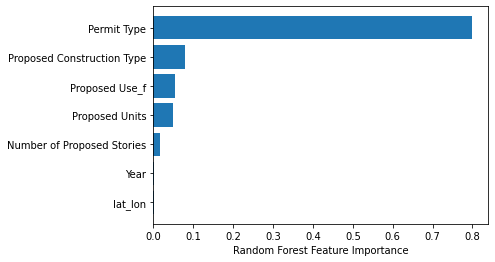

In [72]:
# plot feature importance

randomForestRegressor.feature_importances_
sorted_idx = randomForestRegressor.feature_importances_.argsort()
randomForestRegressor.feature_importances_[sorted_idx]
plt.barh(X.columns[sorted_idx], randomForestRegressor.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

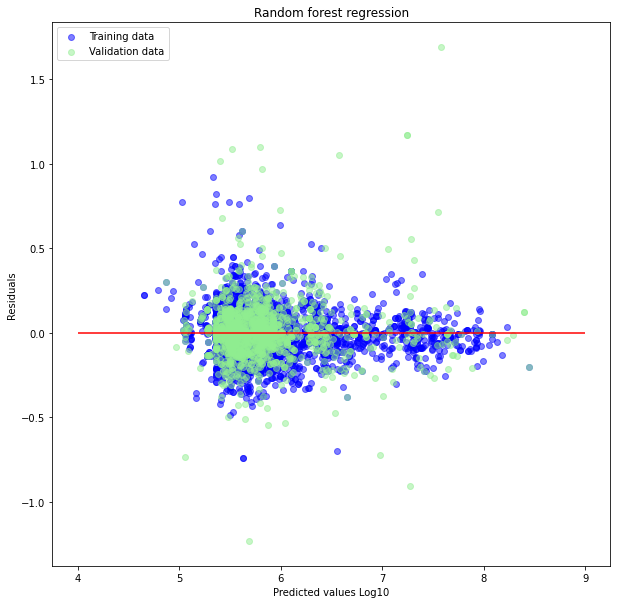

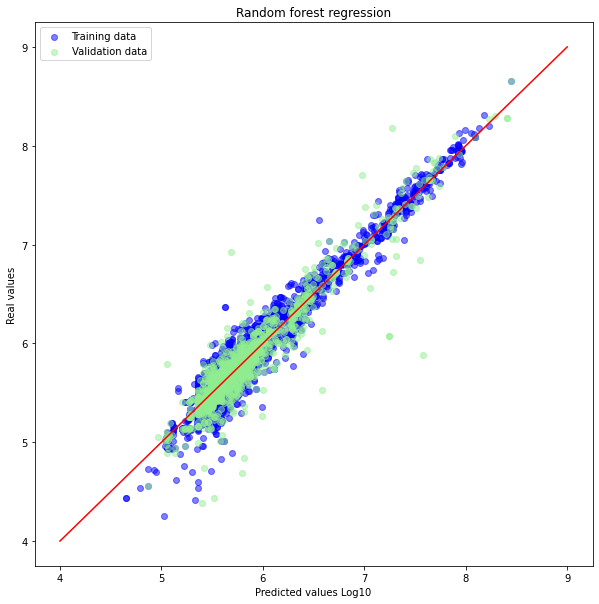

In [75]:
# Plot residuals
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, y_train_pred - Y_train, c = "blue", marker = "o", alpha=0.5, label = "Training data")
plt.scatter(y_test_pred, y_test_pred - Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 4, xmax = 9, color = "red")
plt.show()

# Plot predictions
plt.figure(figsize=(10, 10))
plt.scatter(y_train_pred, Y_train, c = "blue", marker = "o", alpha=0.5,  label = "Training data")
plt.scatter(y_test_pred, Y_test, c = "lightgreen", marker = "o", alpha=0.5, label = "Validation data")
plt.title("Random forest regression")
plt.xlabel("Predicted values Log10")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([4, 9], [4, 9], c = "red")
plt.show()

In [ ]:
# Save Model Using joblib
import joblib

# save the model to disk
filename = 'randomforest_v1.sav'
joblib.dump(regressor, filename)
 
# some time later...
 
# load the model from disk
#loaded_model = joblib.load(filename)
#result = loaded_model.score(X_test, Y_test)
#print(result)